<a href="https://colab.research.google.com/github/Kodchakarn/2108564-Geos-data-sci-anal/blob/master/HW2_6030801021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Pandas 6030801021

## __Import library__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## __import data from google drive__

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1a9Kjj0yOH5EkZfzwCXFfAvimIQgIqx_k' #copy from link
downloaded = drive.CreateFile({'id': file_id})

### ตั้งชื่อไฟล์ที่ import มา

In [ ]:
downloaded.GetContentFile('Fire_Data.xlsx')
dat = pd.read_excel('Fire_Data.xlsx')

### ดูชนิดของข้อมูล

In [ ]:
dat.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

## __Manage Data__

### ดูข้อมูลใน column ACQ_DATE และ ACQ_TIME

In [ ]:
dat['ACQ_DATE'].unique()

array(['2019-12-01T00:00:00.000000000', '2019-12-02T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-12-04T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000', '2019-12-06T00:00:00.000000000',
       '2019-12-07T00:00:00.000000000', '2019-12-08T00:00:00.000000000',
       '2019-12-09T00:00:00.000000000', '2019-12-10T00:00:00.000000000',
       '2019-12-11T00:00:00.000000000', '2019-12-12T00:00:00.000000000',
       '2019-12-13T00:00:00.000000000', '2019-12-14T00:00:00.000000000',
       '2019-12-15T00:00:00.000000000', '2019-12-16T00:00:00.000000000',
       '2019-12-17T00:00:00.000000000', '2019-12-18T00:00:00.000000000',
       '2019-12-19T00:00:00.000000000', '2019-12-20T00:00:00.000000000',
       '2019-12-21T00:00:00.000000000', '2019-12-22T00:00:00.000000000',
       '2019-12-23T00:00:00.000000000', '2019-12-24T00:00:00.000000000',
       '2019-12-25T00:00:00.000000000', '2019-12-26T00:00:00.000000000',
       '2019-12-27T00:00:00.000000000', '2019-12-28

In [ ]:
dat['ACQ_TIME'].unique()

array([ 635,  636, 1906, 1907,  617,  618, 1847, 1848,  558,  559, 1828,
       1829,  540,  719,  720, 1810, 1950,  700,  701, 1931,  641,  642,
        643, 1913,  623,  624, 1854,  604,  605, 1835, 1836,  545,  546,
        726,  727, 1816, 1956,  707,  708, 1938,  648,  649, 1919,  629,
        630, 1900, 1901,  610,  611, 1841, 1842,  552, 1822, 1823,  533,
        534,  713,  714, 1944,  654,  655, 1925, 1926,  616, 1951, 1932,
       1912, 1853, 1834,  725, 1815, 1957,  551, 1804, 1943,  557,  738,
        539, 1809,  622,  706, 1757, 1937,  647, 1918, 1859,  732, 1803,
       1924,  603,  628, 1840,  731, 1821,  712,  653, 1905, 1949, 2002,
        739, 1817,  733, 2003, 1945, 1855, 1920])

## __Transform Data__

### จัดการ ACQ_TIME ในรูป hh:min:sec

In [ ]:
dat['ACQ_TIME'] = (dat['ACQ_TIME']/100).astype(str)
dat['ACQ_TIME']=dat['ACQ_TIME'].str.replace('.',':',regex=True)+':00'

### Combine date and time & ทำเป็น type datetime

In [ ]:
dat['ACQ_TIME'] = pd.to_timedelta(dat['ACQ_TIME'])
dat['DateTime']=dat['ACQ_DATE']+dat['ACQ_TIME']

### check data type

In [ ]:
dat.dtypes

OBJECTID                int64
LATITUDE              float64
LONGITUDE             float64
BRIGHT_TI4            float64
SCAN                  float64
TRACK                 float64
ACQ_DATE       datetime64[ns]
ACQ_TIME      timedelta64[ns]
SATELLITE              object
INSTRUMENT             object
CONFIDENCE             object
VERSION                 int64
BRIGHT_TI5            float64
FRP                   float64
TYPE                    int64
DateTime       datetime64[ns]
dtype: object

### แสดงข้อมูล 5 วัน

In [30]:
dat[dat['DateTime'] <= (dat['DateTime'].iloc[0] + pd.Timedelta(days=5))]

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,delmin,xutm,yutm
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,468103.081694,1.806232e+06
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,472209.159504,1.823052e+06
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,507319.399657,1.872444e+06
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,457180.335393,1.828813e+06
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,460826.166829,1.865734e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,07:01:00,N,VIIRS,n,1,298.2,2.9,0,2019-12-05 07:01:00,4 days 00:26:00,5786.0,495300.202414,2.048752e+06
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,07:01:00,N,VIIRS,n,1,299.0,5.4,0,2019-12-05 07:01:00,4 days 00:26:00,5786.0,632701.319756,2.176103e+06
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,284.8,0.3,0,2019-12-05 19:31:00,4 days 12:56:00,6536.0,617163.056144,2.158770e+06
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,285.5,1.1,0,2019-12-05 19:31:00,4 days 12:56:00,6536.0,617047.016728,2.158218e+06


## __Plot__

### หาผลต่างของเวลาเพื่อใช้ในการ Plot โดยแปลงให้อยู่ในหน่วยนาที

In [29]:
dat['delta']=dat['DateTime']-dat['DateTime'].iloc[0]
dat['delmin']=(dat['delta'].dt.total_seconds())/60
dat

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,delmin,xutm,yutm
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,468103.081694,1.806232e+06
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,472209.159504,1.823052e+06
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,507319.399657,1.872444e+06
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,457180.335393,1.828813e+06
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,460826.166829,1.865734e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0,366602.824369,1.970512e+06
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0,378773.429489,1.965712e+06
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0,371855.275225,1.964983e+06
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0,375559.971574,1.965702e+06


### ทำในรูปแบบ UTM

In [ ]:
!pip install pyproj
from pyproj import Transformer
tran = Transformer.from_crs("epsg:4326", "+proj=utm +zone=47N +ellps=WGS84", always_xy=True)
xutm, yutm = tran.transform(dat["LONGITUDE"].values, dat["LATITUDE"].values)
dat["xutm"] = xutm
dat["yutm"] = yutm

     |████████████████████████████████| 10.9MB 366kB/s 


### ทำตารางเก็บข้อมูล 5 วัน

In [32]:
dat2 = dat[dat['DateTime'] <= (dat['DateTime'].iloc[0] + pd.Timedelta(days=5))]

### Plot graph ระหว่าง X Y และ Time โดยใช้ Time เป็นหน่วยวัน

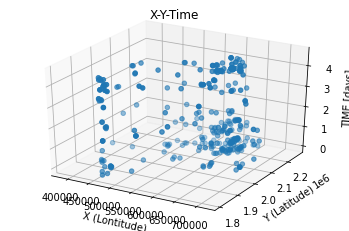

In [33]:
g = plt.figure()
a = g.add_subplot(111, projection='3d')
a.scatter(dat2.xutm, dat2.yutm,(dat2.delmin)/1440)
a.set_xlabel('X (Lontitude)')
a.set_ylabel('Y (Latitude)')
a.set_zlabel('TIME [days]')
a.set_title('X-Y-Time')
plt.show()